In [ ]:
# Download Building Data
import sys
'geopandas' in sys.modules
!pip install geopandas
import zipfile
import os, io
import requests
import geopandas as gpd
from pyproj import Proj, CRS, transform

In [3]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/387b2e3b-2a76-4199-8b3b-0b7d22e2ec10/resource/c57a333a-dc6c-416e-8dd0-7b7964161720/download/3D%20Massing%20(WGS84).zip'
local_path = './tmp'
print('Downloading zipped shapefile…')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to tmp folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)
shp= gpd.read_file(r'./tmp/3DMassingShapefile_2022_WGS84.shp')
shp.head(5)

Done
['3DMassingShapefile_2022_WGS84.dbf', '3DMassingShapefile_2022_WGS84.prj', '3DMassingShapefile_2022_WGS84.shp', '3DMassingShapefile_2022_WGS84.shx']


,MIN_HEIGHT,MAX_HEIGHT,AVG_HEIGHT,HEIGHT_MSL,SURF_ELEV,HEIGHT_SRC,BLDG_SRC,LONGITUDE,LATITUDE,SHAPE_LENG,SHAPE_AREA,geometry
0,0.0,9.3506,7.3090,165.570,158.260969,Lidar-Derived,Photogrammetrics,-79.592266,43.660304,1906.538164,180.235751,"POLYGON ((-8860176.220 5412977.925, -8860212.9..."
1,0.0,12.8670,8.2040,164.810,156.605735,Lidar-Derived,Photogrammetrics,-79.588970,43.663573,1434.663690,220.019548,"POLYGON ((-8859825.993 5413524.684, -8859827.5..."
2,0.0,7.6432,4.1913,160.644,156.452207,Lidar-Derived,Photogrammetrics,-79.588479,43.664104,612.628860,111.087312,"POLYGON ((-8859772.590 5413596.135, -8859768.3..."
3,0.0,8.0415,4.8489,159.575,154.725699,Lidar-Derived,Photogrammetrics,-79.583894,43.660113,413.543528,89.460670,"POLYGON ((-8859259.827 5412997.345, -8859222.9..."
4,0.0,9.1097,5.9776,161.652,155.674130,Lidar-Derived,Photogrammetrics,-79.584291,43.658825,263.863914,68.834491,"POLYGON ((-8859298.506 5412800.913, -8859274.3..."


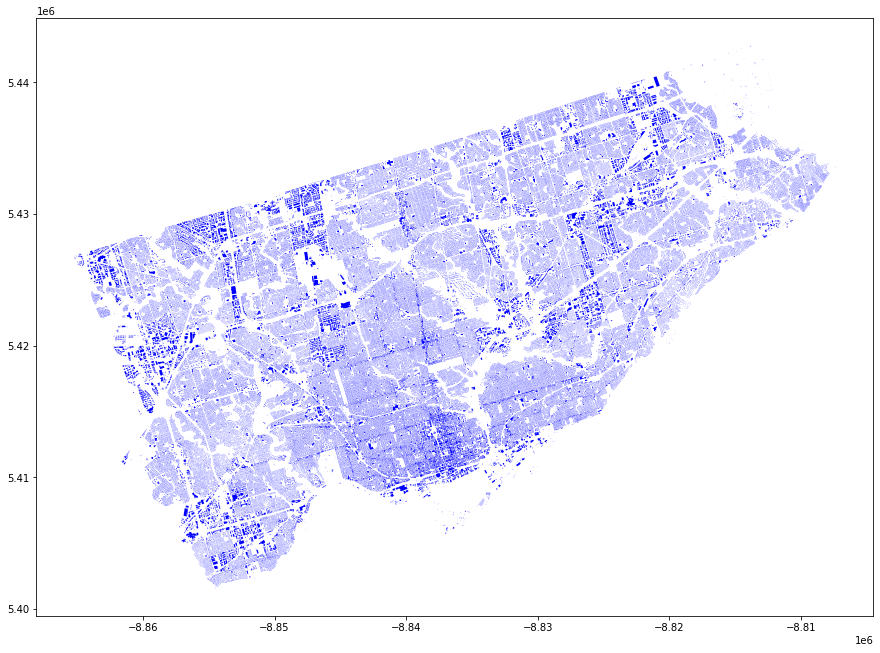

In [4]:
ax = shp.plot(figsize = (15,15), linewidth = 1, color = 'blue')